<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 1 : Cinétique des gaz parfaits</h2>

Veuillez indiquer le nom des membres de votre équipe dans la cellule suivante.

Antoine Veillette, Antoine Reid, Zachary Gauthier, Xavier Mathieu

# Introduction #
Ce travail révise d'abord quelques bases générales de mécanique statistique classique avec le script `tds2Danimation_hXX.py` qui simule la théorie cinétique des gaz parfaits en 2D. Cette simulation utilise le concept de sphères dures, mais ici pour le cas des particules d'un gaz afin d'introduire des collisions élastiques entre elles sur leurs trajectoires ballistiques. Notez qu'une sphère est colorée et grossie seulement pour l’effet visuel dans l'animation, la physique de l’algorithme codé considère bien des particules totalement identiques. Les questions sur cette simulation, à répondre directement dans les cellules du carnet _(Notebook)_ ici-même, explorent quelques paramètres de la thermodynamique statistique et introduisent de nouveaux termes utiles à l'étude du mouvement des électrons dans la matière.

_N.B._ 
- _Pour montrer les animations à l'écran, le script `tds2Danimation_hXX.py` importe la librairie `VPython` qu'il faut donc installer. Des liens vers sa documentation et de l'information complémentaire sont donnés dans la médiagraphie à la fin._
- _Le code dans ce script est abusivement commenté dans notre contexte pédagogique, mais il serait bien sûr préférable de s’en tenir aux recommandations du <a href="https://www.python.org/dev/peps/pep-0008"> PEP 8 — Style Guide for Python Code</a>._
- _Notez finalement que la boucle principale à la fin du script laisse l'utilisateur voir l'animation aussi longtemps que souhaité, assurez-vous donc de savoir comment l'interrompre correctement avant de lancer la simulation ou de la remplacer par une boucle `for`._

# 1<sup>re</sup> partie - Cinétique CLASSIQUE des gaz parfaits #

### Simulation 2D ###

In [54]:
#!pip install matplotlib
%run tds2Danimation_h25.py

# ou
#%run tds3Dsim_h25.py #si disponible : script sans la lente animation Vpython qui est en développement à la session h25!
# Remplacez "XX" par les deux derniers chiffres de l'année de votre session.
# N'hésitez pas à exécuter l'animation 2D ou la simulation 3D à l'extérieur du _Notebook_. Cette cellule vise à préciser que les questions qui suivent se basent sur ces scripts et doivent mener aux mêmes répomses autant en 2D qu'en 3D.

<IPython.core.display.Javascript object>

### Questions statistiques ###

**I.** _(3 points)_  &mdash; Utilisez la liste finale des vecteurs de quantité de mouvement $\vec{p}$ de toutes les sphères pour calculer la moyenne de son carré $\langle p^2\rangle=\langle\vec{p}\cdot\vec{p}\rangle$ en écrivant le code nécessaire dans la cellule qui suit. 

In [55]:
from vpython import *
import numpy as np
from part1_data import p, particle_path

psq = np.array([dot(i,i) for i in p]) # on initialise un array du carré des quantités de mouvement

p2_mean = np.mean(psq) # on moyenne tous les éléments

print(f"Moyenne du carré de la quantité de mouvement : {p2_mean} (kg m)/s")

Moyenne du carré de la quantité de mouvement : 5.600000778482891e-47 (kg m)/s



**II.** _(2 points)_  &mdash; La température $T$ (macroscopique) est proportionnelle à l'énergie cinétique moyenne $E_{cin}$ de l'ensemble des particules lorsque ce système est rendu à l'équilibre. Celle-ci peut se calculer classiquement selon son <a href="https://fr.wikipedia.org/wiki/%C3%89quipartition_de_l%27%C3%A9nergie">principe d'équipartition</a>, _i.e._ en répartissant l'énergie également sur chaque degré de liberté ici en translation seulement d'où, au total pour $\text{DIM}=1,2\text{ ou } 3$ dimensions d'espace réel,
\begin{equation}
E_{cin}=\frac{\langle p^2 \rangle}{2m}=\text{DIM}\times\frac{1}{2}k_BT
\end{equation}
avec $k_B$, la constante de Boltzmann et $m$, la masse de chaque particule. Quelle est la température du gaz de sphères dures à la fin de la simulation? Est-ce qu'elle a changé significativement par rapport à sa valeur initiale?

In [56]:
# Déclaration de variables physiques "Typical values"
DIM = 2 #Nombre de degrés de liberté de la simulation 
mass = 4E-3/6E23 # helium mass
Ratom = 0.01 # wildly exaggerated size of an atom
k = 1.4E-23 # Boltzmann constant
T = 300 # around room temperature

print(f"Énergie cinétique moyenne avant la simulation [DIM * 1/2 * k_b * T] : {DIM / 2 * k * T} J")
print(f"Énergie cinétique moyenne à la fin de la simulation [<p^2>/(2m)] : {p2_mean / (2*mass)} J")
print(f"Température à la fin de la simulation [2 * E / (DIM * k)] : {p2_mean / (2*mass*k)} K")

Énergie cinétique moyenne avant la simulation [DIM * 1/2 * k_b * T] : 4.1999999999999995e-21 J
Énergie cinétique moyenne à la fin de la simulation [<p^2>/(2m)] : 4.200000583862169e-21 J
Température à la fin de la simulation [2 * E / (DIM * k)] : 300.0000417044406 K


On remarque que la température finale est de 300.0000417 K environ, donc qu'elle n'a pas subi de variation significative par rapport à la valeur initiale de 300 K

**III.** _(10 points)_ &mdash; Modifiez le code de la simulation pour ajouter une fonction qui suit la trajectoire d'UNE SEULE particule, c'est-à-dire qu'elle doit enregistrer, dans une liste, des valeurs de variables pour cette particule et ce, à chacune de ses collisions avec une autre particule (_i.e._ excluez les collisions avec les parois de la boîte). Les deux variables scalaires à lister sont:
- la distance que la particule a parcouru entre chaque collision,
- le temps écoulé entre ces collisions.

Copiez le code de votre fonction dans la cellule qui suit en y commentant clairement les variables pour ces listes qui devront persister après avoir interrompu l'exécution de la simulation. N'oubliez pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

In [57]:
# pas une fonction, plutôt une classe.
from enum import Enum
class COL(Enum):
    WALL = 0
    ATOM = 1

class particule:
    """
    Classe représentant une particule dans un système physique
    On souhaite conserver la trajectoire totale de la particule suivie
    """
    def __init__(self):
        self.id = 0
        self.datalist = []
    def update(self, time: float, pos:vector, vel:vector, col:Enum):
        new_row = {
            'time': time, # temps où survient la collision
            'positionVec': (pos.x, pos.y, pos.z), # position de la particule lors de la collision
            'velocityVec': (vel.x, vel.y, vel.z), # vitesse de la particule lors de la collision
            'coll': col # type de collision, mur ou atome
        }
        self.datalist.append(new_row)

    def _clean(self):
        self.df = pd.DataFrame(self.datalist)


def distances(atome):
    pos = atome.df.positionVec.iloc[...].apply(lambda r: vector(*r))
    mask = atome.df.coll.iloc[...].apply(lambda item: item.value).to_numpy()
    pos = pos.to_list()
    dist = []
    for i in range(len(pos)-1):
        dist.append(mag(pos[i+1] - pos[i]))
    dist = np.array(dist)
    interAtomDist = []
    for d,m in zip(dist,mask):
        if m:
            interAtomDist.append(d)
        else:
            interAtomDist[-1] += d
    return np.array(interAtomDist) # retourne un array de la distance parcourue entre chaque collision



**IV.** _(2 points)_ &mdash; Calculez le **libre parcours moyen** $l_{moy}$ et le **temps de collision** $\tau$ qui sont les valeurs moyennes des deux listes compilées au numéro précédent.

_(Pour votre information, le libre parcours moyen est de l’ordre de 100 nm dans l'air à température et pression ambiantes, mais_ $l_{moy}$ _peut dépasser 100 000 km dans une enceinte sous vide avec les technologies de pompes modernes!)_



In [58]:
xs = distances(atm)
#ts = atm.df.time[atm.df.coll == COL.ATOM]
ts = atm.df.loc[atm.df["coll"].apply(lambda x: x.value == 1), "time"] # seulement collision avec un autre atome
l_moy = np.mean(xs)
tau = np.mean(np.diff(ts))
print(l_moy, tau)
print(f"Libre parcours moyen : {l_moy} m")
print(f"Temps de collision : {tau} s")

0.20832997046380242 0.00026729729729729095
Libre parcours moyen : 0.20832997046380242 m
Temps de collision : 0.00026729729729729095 s


**V.** _(2 points)_ Calculez la vitesse $\vec{v}$ de la particule entre chaque paire de collisions. Quelle est la vitesse moyenne $\langle\vec{v}\rangle$ de la particule?

In [59]:

v_norm = atm.df.loc[atm.df["coll"].apply(lambda x: x.value == 1), "velocityVec"].apply(lambda r : np.sqrt(np.sum(np.array([i**2 for i in r]))))

v_mean = np.mean(v_norm)
print(f"Vitesse moyenne de la particule : {v_mean} m/s")

Vitesse moyenne de la particule : 1027.7808995598014 m/s


**VI.** _(5 points)_ &mdash; Pour cette même liste de vitesses, comparez les distributions de la norme $||\vec{v}||$, du carré $v^2$ et d’une de ses composantes $v_x^2$ en étalonnant l’abscisse pour contraster les histogrammes avec une échelle appropriée. Indiquez sur ce graphique la moyenne, le mode, la médiane et la moyenne quadratique des distributions.

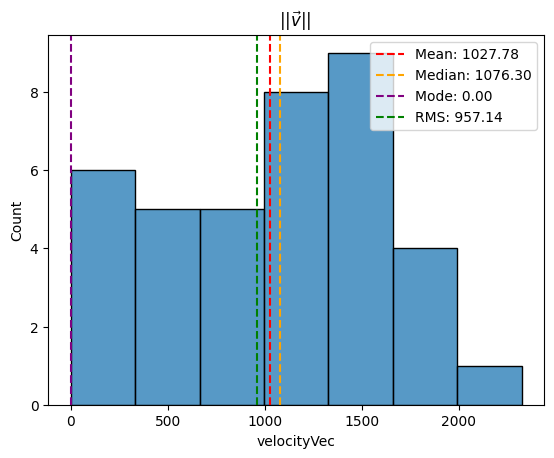

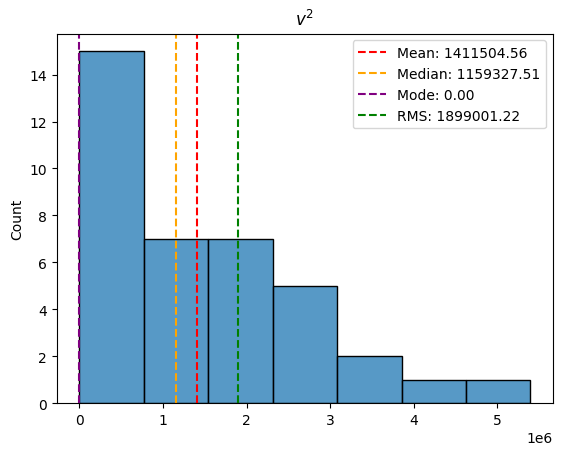

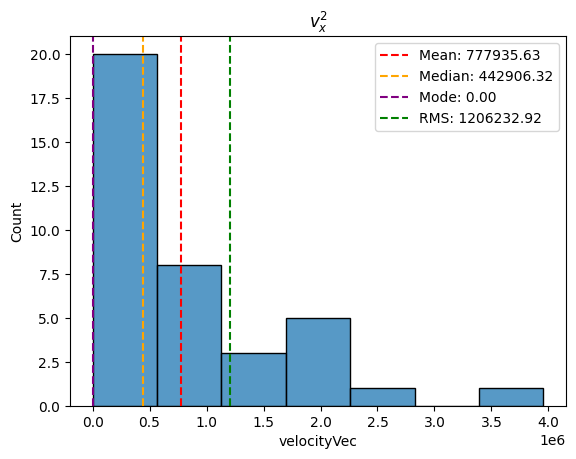

In [60]:
#!pip install seaborn

v_x = atm.df.loc[atm.df["coll"].apply(lambda x: x.value == 1), "velocityVec"].apply(lambda r : r[0])
v_xsq = v_x**2

import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode

plt.figure()
plt.title(r"$ || \vec{v} || $ ")

sns.histplot(v_norm)
plt.axvline(v_mean, color='red', linestyle='--', label=f'Mean: {v_mean:.2f}')
plt.axvline(np.median(v_norm), color='orange', linestyle='--', label=f'Median: {np.median(v_norm):.2f}')
plt.axvline(mode(v_norm), color='purple', linestyle='--', label=f'Mode: {mode(v_norm):.2f}')
plt.axvline(np.sqrt(np.mean(v_squared)), color='green', linestyle='--', label=f'RMS: {np.sqrt(np.mean(v_squared)):.2f}')
plt.legend()

v_squared = np.array(v_norm)**2

plt.figure()
plt.title(r"$v^2$")

sns.histplot(v_squared)
plt.axvline(np.mean(v_squared), color='red', linestyle='--', label=f'Mean: {np.mean(v_squared):.2f}')
plt.axvline(np.median(v_squared), color='orange', linestyle='--', label=f'Median: {np.median(v_squared):.2f}')
plt.axvline(mode(v_squared), color='purple', linestyle='--', label=f'Mode: {mode(v_squared):.2f}')
plt.axvline(np.sqrt(np.mean(v_squared**2)), color='green', linestyle='--', label=f'RMS: {np.sqrt(np.mean(v_squared**2)):.2f}')
plt.legend()

plt.figure()
plt.title(r"$v_x^2$")
sns.histplot(v_xsq)
plt.axvline(np.mean(v_xsq), color='red', linestyle='--', label=f'Mean: {np.mean(v_xsq):.2f}')
plt.axvline(np.median(v_xsq), color='orange', linestyle='--', label=f'Median: {np.median(v_xsq):.2f}')
plt.axvline(mode(v_xsq), color='purple', linestyle='--', label=f'Mode: {mode(v_xsq):.2f}')
plt.axvline(np.sqrt(np.mean(v_xsq**2)), color='green', linestyle='--', label=f'RMS: {np.sqrt(np.mean(v_xsq**2)):.2f}')
plt.legend()



**Bonus.** _(4 points)_ &mdash; Montrez que 
- (a) le théorème central limite est satisfait par une des distributions de vitesse du numéro précédent,
- (b) le système simulé est ergodique.

In [53]:

#

# Médiagraphie #
 - La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour faciliter la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le code adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.